In [42]:
#Import Packages

import pandas as pd
import seaborn as sns
import matplotlib 
import numpy as np
import pickle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.feature_selection import SelectFromModel #this is used to keep a threshold for our randomforest feature selection
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Loading important files from Pickle folder

    
path_X_important_train = "Pickles/X_important_train.pickle"
with open(path_X_important_train, 'rb') as data:
    X_important_train = pickle.load(data)
    
path_X_important_test = "Pickles/X_important_test.pickle"
with open(path_X_important_test, 'rb') as data:
    X_important_test = pickle.load(data)
    
path_X_train = "Pickles/X_train.pickle"
with open(path_X_train, 'rb') as data:
    X_train = pickle.load(data)
    
path_sfm = "Pickles/sfm.pickle"
with open(path_sfm, 'rb') as data:
    sfm = pickle.load(data)


path_feature_importances = "Pickles/feature_importances.pickle"
with open(path_feature_importances, 'rb') as data:
    feature_importances = pickle.load(data)
    
path_final_model = "Pickles/final_model.pickle"
with open(path_final_model, 'rb') as data:
    final_model = pickle.load(data)
    
path_last_model = "Pickles/last_model.pickle"
with open(path_last_model, 'rb') as data:
    last_model = pickle.load(data)
    


In [44]:
#Loading the coded dataset from previod MindcareImplementation notebook
data=pd.read_csv('coded_data.csv')


# 1) ScatterPlot

Below scatterplot represents the bodyweight and age relation with respect to their Self-harm tendencies

Text(0, 0.5, 'Weight')

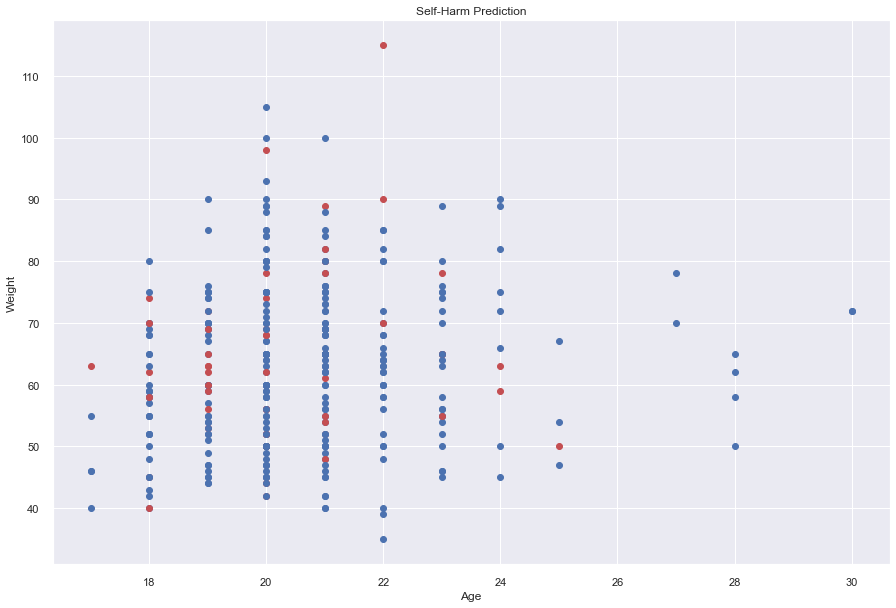

In [45]:
#Plotting a single scatterplot wrt Age 
# create a figure and axis
fig, ax = plt.subplots()
# scatter the sepal_length against the sepal_widthcolors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
colors = {1:'r', 0:'b'}
# plot each data-point
for i in range(len(data['Age'])):
    ax.scatter(data['Age'][i], data['Bodyweight in kg(kilogram)'][i],color=colors[data['Selfharm'][i]])

# set a title and labels
ax.set_title('Self-Harm Prediction')
ax.set_xlabel('Age')
ax.set_ylabel('Weight')

# 2) Categorical ScatterPlot

Using seaborn library which is a statistical data visualization library in python. Plotting the categorical attribute Education Status with respect to the Age. This plot signifies that many of our responsers Passouts and current students.

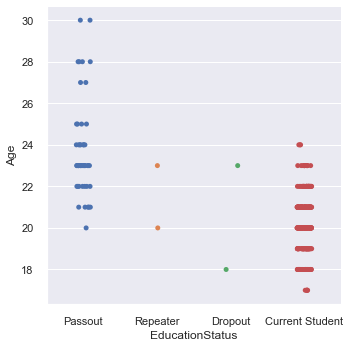

In [46]:
#Plotting categorical ScatterPlot
sa=sns.catplot(x="EducationStatus", y="Age", data=data)
sa.set(xticklabels=['Passout','Repeater','Dropout','Current Student'])

# 3) Bar chart

Plotting a bar chart using seaborn library to visualize the Alcohol abuse among our responsers which contributes to the self-harm tendencies

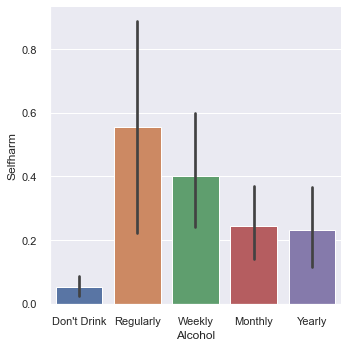

In [47]:
#Using seaborn plotting bar chart
ma=sns.catplot(x="Alcohol", y="Selfharm", kind="bar", data=data)
ma.set(xticklabels=["Don't Drink",'Regularly','Weekly','Monthly','Yearly'])

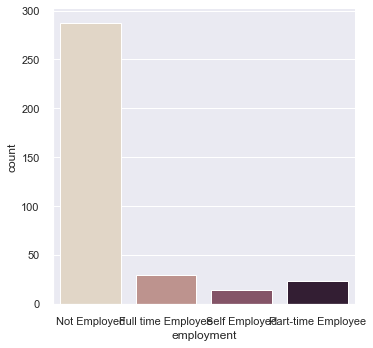

In [48]:
#Number of observation in each category
ta=sns.catplot(x="employment", kind="count", palette="ch:.25", data=data)
ta.set(xticklabels=['Not Employed','Full time Employee','Self Employed','Part-time Employee'])


# 4) Cross Tab Bar chart

Plotting a cross tab bar chart depicting the most important feature Any_attempt_of_Suicide with respect to Self-harm tendencies.

<Figure size 576x432 with 0 Axes>

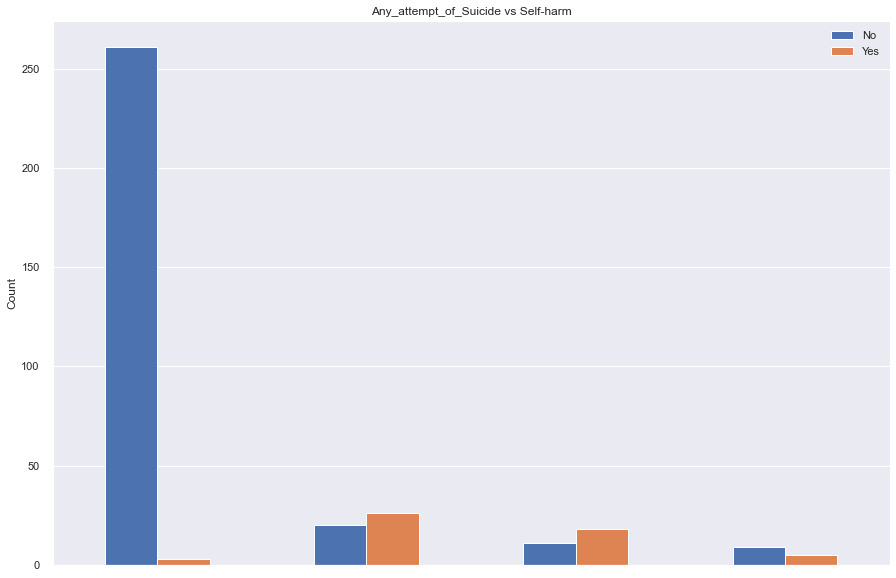

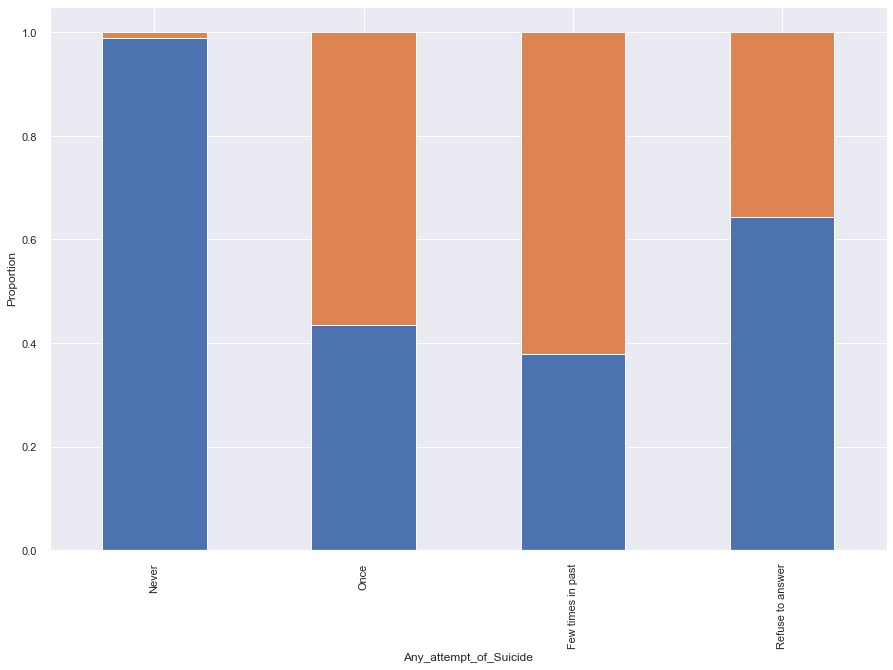

In [55]:
plt.figure(figsize=[8,6])
ax1 =pd.crosstab(data['Any_attempt_of_Suicide'],data['Selfharm']).plot(kind='bar')
plt.title('Any_attempt_of_Suicide vs Self-harm')
plt.ylabel('Count')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax1.axes.get_xaxis().set_visible(False)
L=plt.legend()
L.get_texts()[0].set_text('No')
L.get_texts()[1].set_text('Yes')

N = data['Any_attempt_of_Suicide'].nunique()
ind = np.arange(N)
table=pd.crosstab(data['Any_attempt_of_Suicide'],data['Selfharm'])
ax2 = table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Any_attempt_of_Suicide')
plt.ylabel('Proportion')
plt.xticks(ind, encoding['Any_attempt_of_Suicide'].keys())
ax2.get_legend().remove()
plt.show()

# 5) Heat Map

From the heatmap we can learn which features are affecting more to the Self-harm Tendencies. And also to understand the correlation between each feature with one another

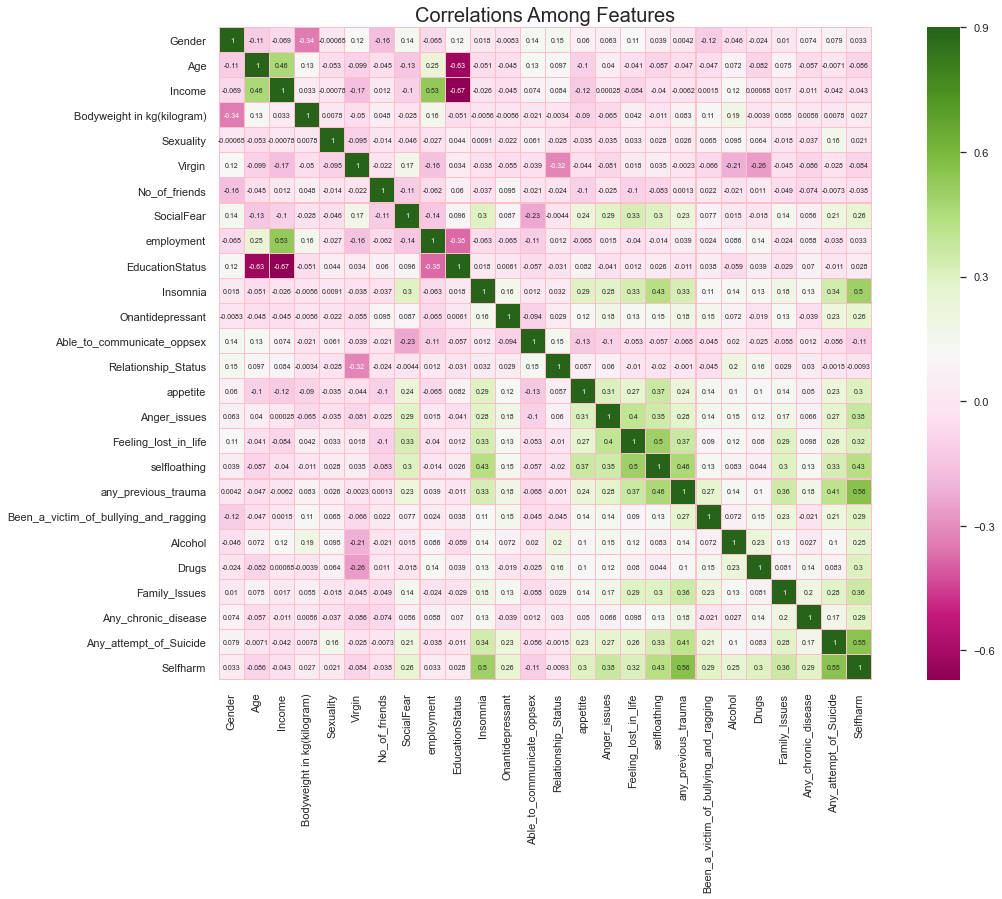

In [70]:
plt.subplots(figsize = (20,12))
sns.heatmap(data.corr(), 
            annot=True,
            annot_kws={"size": 7},
            #mask = mask,
            cmap = 'PiYG',
            linewidths=0.1, 
            linecolor='pink',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);
#RdBu_r

# 6) Feature Importance horizontal bar-chart

Using random forest classifier ensemble method finding out the importance of each features in the data set and plotting a horizontal bar chart of feature importance

In [89]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'green') \
       .set_title(title, fontsize = 20)

In [90]:
base_imp = imp_df(X_train.columns, final_model.feature_importances_)
base_imp

,feature,feature_importance
0,Any_attempt_of_Suicide,0.259423
1,any_previous_trauma,0.141120
2,Insomnia,0.070855
3,selfloathing,0.062999
4,Anger_issues,0.052489
5,Bodyweight in kg(kilogram),0.050574
6,Been_a_victim_of_bullying_and_ragging,0.046638
7,No_of_friends,0.041594
8,Alcohol,0.040699
9,Family_Issues,0.032174


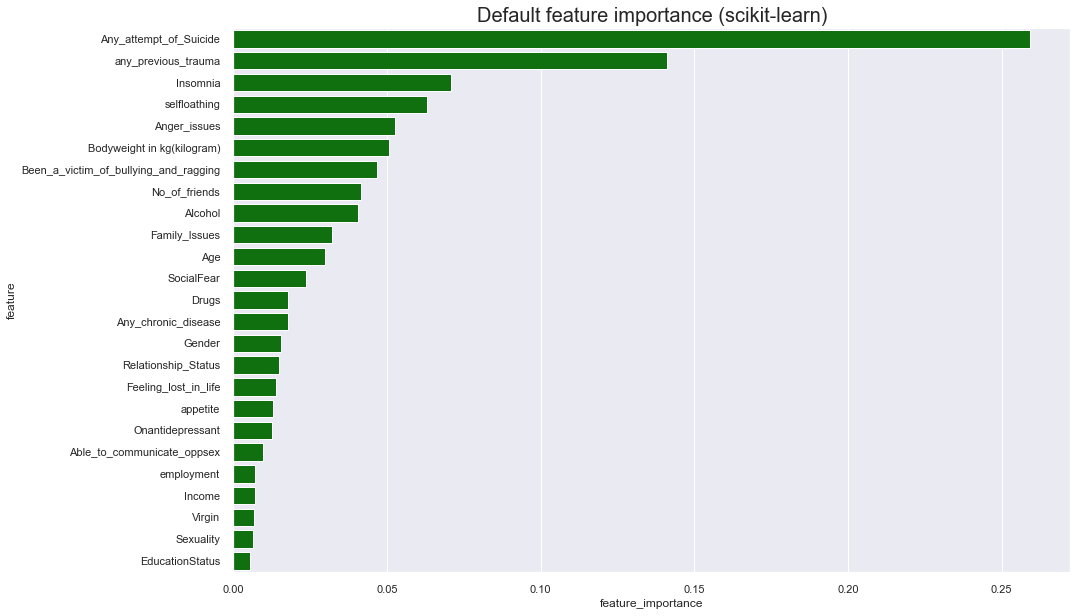

In [91]:
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

# 7) Random Decision Tree Visualisation

Inorder to understand how our classifier predicts the result. A small effort to depict a single decision tree and it's Splitting. Here at each parent node we consider the feature and respectively using Gini Index method split into classes.

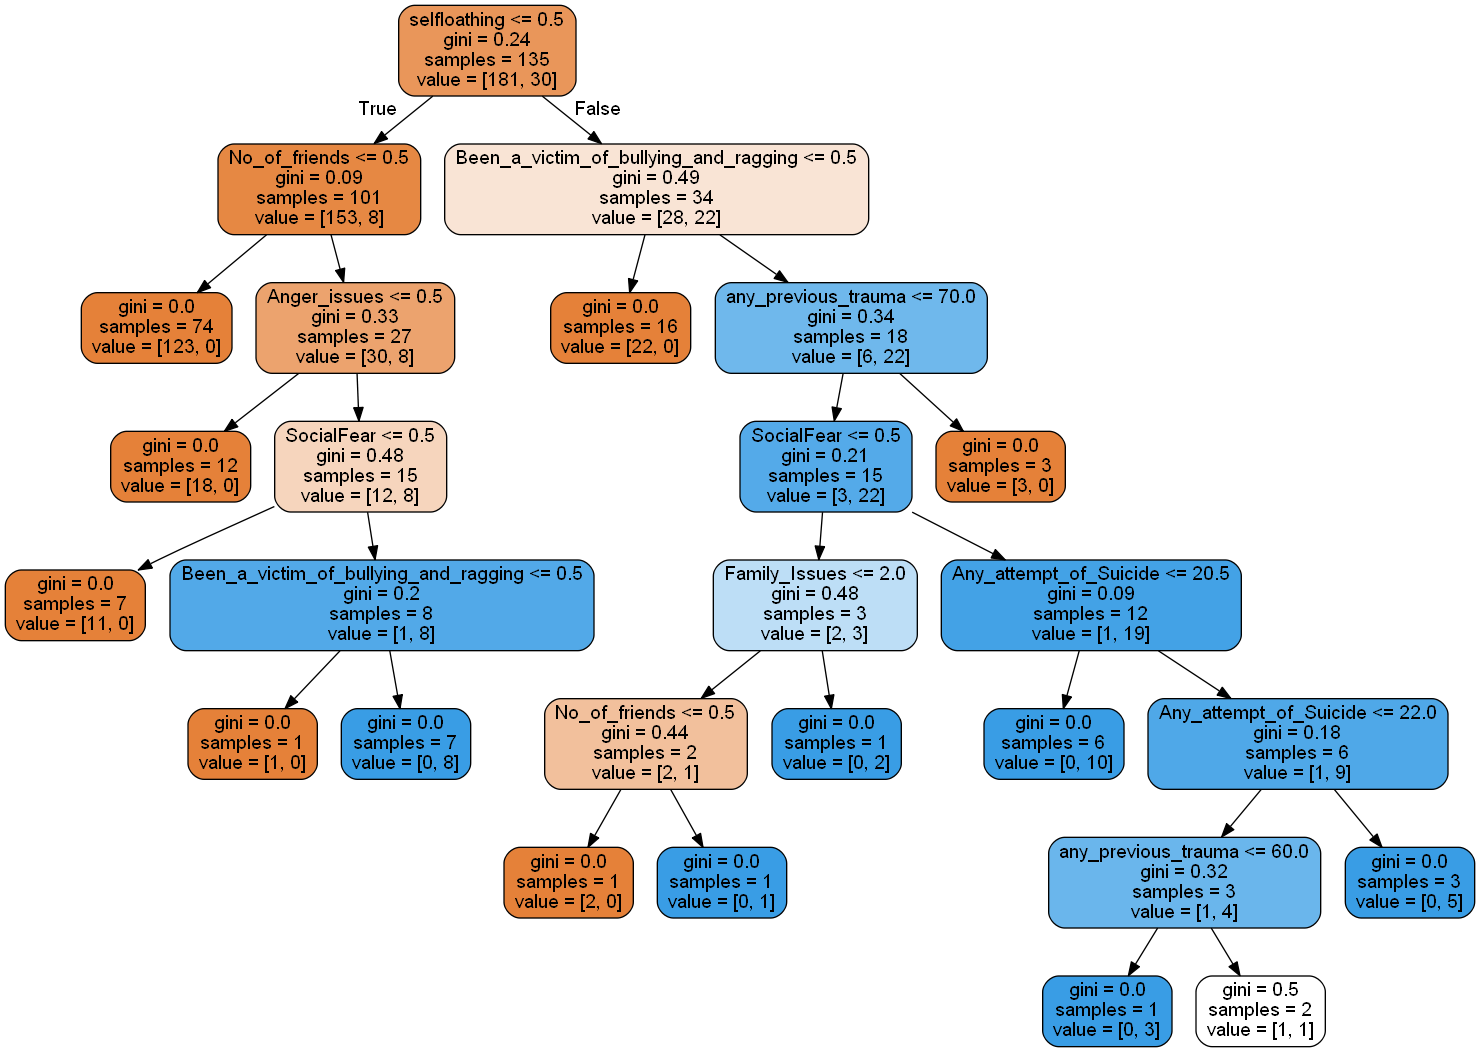

In [92]:
vis = ['Any_attempt_of_Suicide'                 
,'any_previous_trauma'                      
,'Insomnia'                                 
,'selfloathing'                     
,'Anger_issues'                         
,'Bodyweight in kg(kilogram)'  
,'Been_a_victim_of_bullying_and_ragging'   
,'No_of_friends'                           
,'Alcohol'                                 
,'Family_Issues'                           
,'Age'                                  
,'SocialFear']
# Extract single tree
estimator = last_model.estimators_[10]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = vis,
                rounded = True, proportion = False, 
                precision = 2, filled = True)



import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')


# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')